In [ ]:

# ML Lab — Assignment 2 (Linear Regression from scratch + sklearn)
# Date: August 20, 2025


In [ ]:
import os, math, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, Tuple
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
np.random.seed(42)

In [23]:
# -------------------- Imports --------------------
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import kagglehub

# -------------------- Step 1: Download and Load Dataset --------------------
path = kagglehub.dataset_download("camnugent/california-housing-prices")
FULL_CSV = Path(path) / "housing.csv"  # Adjust if filename differs

if not FULL_CSV.exists():
    raise FileNotFoundError(f"Dataset file not found: {FULL_CSV}")

df = pd.read_csv(FULL_CSV)
print("Full dataset shape:", df.shape)

# -------------------- Step 2: Train-Test Split --------------------
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("Train shape:", df_train.shape)
print("Test shape:",  df_test.shape)

# -------------------- Step 3: Standardize Features --------------------
target_col = "median_house_value"
feature_cols = df_train.select_dtypes(include=np.number).columns.drop(target_col).tolist()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train[feature_cols])
X_test_scaled  = scaler.transform(df_test[feature_cols])

# -------------------- Step 4: Add Intercept Column --------------------
X_train_design = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_design  = np.c_[np.ones(X_test_scaled.shape[0]),  X_test_scaled]

# -------------------- Step 5: Convert to DataFrame --------------------
design_cols = ["Intercept"] + feature_cols
X_train_df = pd.DataFrame(X_train_design, columns=design_cols)
X_test_df  = pd.DataFrame(X_test_design,  columns=design_cols)

# -------------------- Step 6: Save Preprocessed Data --------------------
X_train_df.to_csv("X_train_preprocessed.csv", index=False)
X_test_df.to_csv("X_test_preprocessed.csv", index=False)
print("Saved X_train_preprocessed.csv and X_test_preprocessed.csv")

Full dataset shape: (20640, 10)
Train shape: (16512, 10)
Test shape: (4128, 10)
Saved X_train_preprocessed.csv and X_test_preprocessed.csv


In [26]:
# -------------------- Step 7: Compute Normal Equation --------------------
# Prepare design matrix X and target vector y
X = X_train_df.values  # shape: (n_samples, d+1)
y = df_train[target_col].values.reshape(-1, 1)  # shape: (n_samples, 1)

# Compute θ̂ = (XᵀX)^(-1) Xᵀy
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# -------------------- Step 8: Display Parameters --------------------
print("Estimated parameters (θ̂):")
for name, value in zip(design_cols, theta_hat.flatten()):
    print(f"{name:>15}: {value:.4f}")

Estimated parameters (θ̂):
      Intercept: 207194.6937
      longitude: -85503.2182
       latitude: -90698.8488
housing_median_age: 14905.9064
    total_rooms: -17805.4185
 total_bedrooms: 48712.3433
     population: -43766.4912
     households: 17654.5007
  median_income: 77194.6995


In [29]:
# Predict on training data
y_pred = X @ theta_hat

# Compute Mean Squared Error
mse = np.mean((y - y_pred) ** 2)
print(f"\nTraining Mean Squared Error: {mse:.2f}")


Training Mean Squared Error: 4811134397.88


In [30]:
# from google.colab import drive
# drive.mount('/content/drive')
theta_hat = np.linalg.pinv(X.T @ X) @ X.T @ y

Full dataset shape: (20640, 10)
Train shape: (16512, 10)
Test shape: (4128, 10)
Epoch 0: MSE = 28148711615.5157
Epoch 100: MSE = 6428462204.4413
Epoch 200: MSE = 3407780742.3858
Epoch 300: MSE = 2924900807.8509
Epoch 400: MSE = 2800275885.5158
Epoch 500: MSE = 2734588405.0944
Epoch 600: MSE = 2684863844.0686
Epoch 700: MSE = 2643766794.5009
Epoch 800: MSE = 2609189695.4210
Epoch 900: MSE = 2579960054.2126


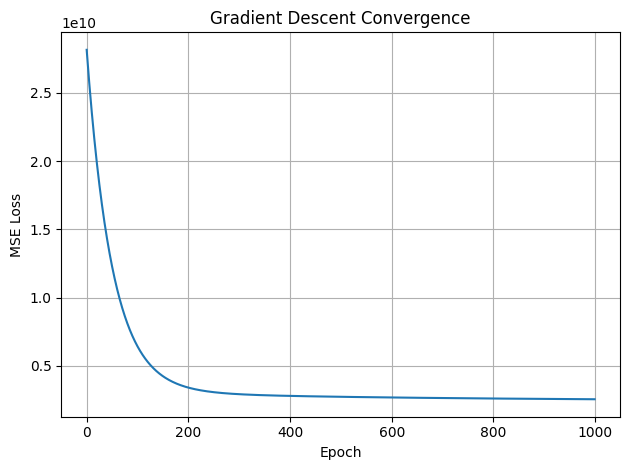


Learned Parameters (θ̂):
      Intercept: 207185.7489
      longitude: -43506.8744
       latitude: -48761.8130
housing_median_age: 20552.8410
    total_rooms: -4440.0524
 total_bedrooms: 22169.1414
     population: -32668.8314
     households: 22408.0364
  median_income: 78860.5196


In [37]:
# -------------------- Imports --------------------
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import kagglehub

# -------------------- Step 1: Load and Preprocess Dataset --------------------
# Download and load California housing dataset
path = kagglehub.dataset_download("camnugent/california-housing-prices")
FULL_CSV = Path(path) / "housing.csv"

if not FULL_CSV.exists():
    raise FileNotFoundError(f"Dataset file not found: {FULL_CSV}")

df = pd.read_csv(FULL_CSV)
print("Full dataset shape:", df.shape)

# Split into train and test
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("Train shape:", df_train.shape)
print("Test shape:",  df_test.shape)

# Standardize features
target_col = "median_house_value"
feature_cols = df_train.select_dtypes(include=np.number).columns.drop(target_col).tolist()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train[feature_cols])
X_test_scaled  = scaler.transform(df_test[feature_cols])

# Add intercept column
X_train_design = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_design  = np.c_[np.ones(X_test_scaled.shape[0]),  X_test_scaled]

# Prepare target vector
y_train = df_train[target_col].values.reshape(-1, 1)

# -------------------- Step 2: Batch Gradient Descent --------------------
def batch_gradient_descent(X, y, lr=0.01, epochs=1000, tol=None, verbose=False):
    n, d = X.shape
    theta = np.zeros((d, 1))
    losses = []

    for epoch in range(epochs):
        y_pred = X @ theta
        error = y_pred - y
        loss = (1 / (2 * n)) * np.sum(error ** 2)
        losses.append(loss)

        gradient = (1 / n) * X.T @ error
        theta -= lr * gradient

        if verbose and epoch % 100 == 0:
            print(f"Epoch {epoch}: MSE = {loss:.4f}")

        # Early stopping
        if tol and epoch > 0 and abs(losses[-2] - loss) < tol:
            print(f"Early stopping at epoch {epoch} (Δloss < {tol})")
            break

    return theta, losses

# -------------------- Step 3: Run Gradient Descent --------------------
X = X_train_design
y = y_train
theta_gd, loss_history = batch_gradient_descent(X, y, lr=0.01, epochs=1000, tol=1e-6, verbose=True)

# -------------------- Step 4: Plot Loss Curve --------------------
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------- Step 5: Display Final Parameters --------------------
design_cols = ["Intercept"] + feature_cols
print("\nLearned Parameters (θ̂):")
for name, value in zip(design_cols, theta_gd.flatten()):
    print(f"{name:>15}: {value:.4f}")

In [38]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
lr_model = LinearRegression(fit_intercept=False)  # Intercept already included in X
lr_model.fit(X_train_design, y_train)

# Get parameters
theta_sklearn = lr_model.coef_.reshape(-1, 1)  # shape: (d+1, 1)

In [39]:
print("\n🔍 Parameter Comparison (Gradient Descent vs Scikit-Learn):")
for name, theta_gd_val, theta_sk_val in zip(design_cols, theta_gd.flatten(), theta_sklearn.flatten()):
    print(f"{name:>15}: GD = {theta_gd_val:>10.4f} | Sklearn = {theta_sk_val:>10.4f}")


🔍 Parameter Comparison (Gradient Descent vs Scikit-Learn):
      Intercept: GD = 207185.7489 | Sklearn = 207194.6937
      longitude: GD = -43506.8744 | Sklearn = -85503.2182
       latitude: GD = -48761.8130 | Sklearn = -90698.8488
housing_median_age: GD = 20552.8410 | Sklearn = 14905.9064
    total_rooms: GD = -4440.0524 | Sklearn = -17805.4185
 total_bedrooms: GD = 22169.1414 | Sklearn = 48712.3433
     population: GD = -32668.8314 | Sklearn = -43766.4912
     households: GD = 22408.0364 | Sklearn = 17654.5007
  median_income: GD = 78860.5196 | Sklearn = 77194.6995


In [41]:
from sklearn.metrics import mean_squared_error

# Predictions
y_pred_gd = X_train_design @ theta_gd
y_pred_sk = lr_model.predict(X_train_design).reshape(-1, 1)

# MSE
mse_gd = mean_squared_error(y_train, y_pred_gd)
mse_sk = mean_squared_error(y_train, y_pred_sk)

print(f"\n Training MSE Comparison:")
print(f"Gradient Descent MSE : {mse_gd:.2f}")
print(f"Scikit-Learn MSE     : {mse_sk:.2f}")


 Training MSE Comparison:
Gradient Descent MSE : 5110386634.40
Scikit-Learn MSE     : 4811134397.88


/tmp/ipython-input-3504274310.py:65: RuntimeWarning: overflow encountered in square
  loss = (1 / (2 * n)) * np.sum(error ** 2)
/tmp/ipython-input-3504274310.py:68: RuntimeWarning: overflow encountered in matmul
  gradient = (1 / n) * X.T @ error
/tmp/ipython-input-3504274310.py:69: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * gradient
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-3504274310.py:63: RuntimeWarning: overflow encountered in matmul
  y_pred = X @ theta


Saved: loss_vs_iterations.png and .pdf


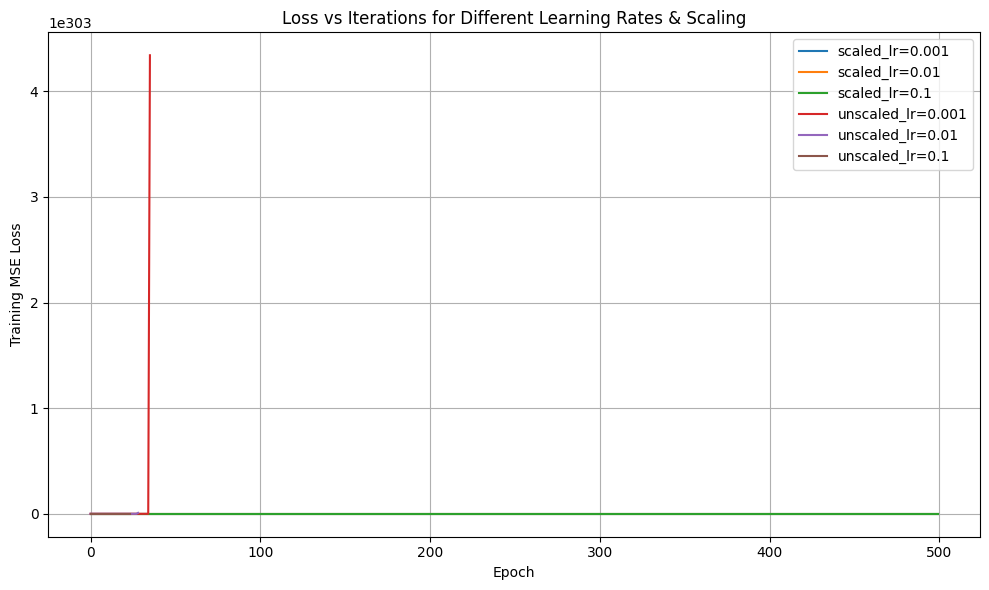

In [42]:
def run_gd_for_lr(X_scaled, X_unscaled, y, lrs, epochs=500):
    results = {}
    for scaled, X in zip(["scaled", "unscaled"], [X_scaled, X_unscaled]):
        for lr in lrs:
            label = f"{scaled}_lr={lr}"
            _, losses = batch_gradient_descent(X, y, lr=lr, epochs=epochs)
            results[label] = losses
    return results

# Prepare unscaled design matrix
X_unscaled = np.c_[np.ones(df_train.shape[0]), df_train[feature_cols].values]
X_scaled = X_train_design  # already standardized + intercept
y = df_train[target_col].values.reshape(-1, 1)

# Run gradient descent for multiple learning rates
lrs = [0.001, 0.01, 0.1]
loss_curves = run_gd_for_lr(X_scaled, X_unscaled, y, lrs)

# Plot
plt.figure(figsize=(10, 6))
for label, losses in loss_curves.items():
    plt.plot(losses, label=label)
plt.xlabel("Epoch")
plt.ylabel("Training MSE Loss")
plt.title("Loss vs Iterations for Different Learning Rates & Scaling")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/loss_vs_iterations.png", dpi=150)
plt.savefig("plots/loss_vs_iterations.pdf")
print("Saved: loss_vs_iterations.png and .pdf")